In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph ,START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
)

In [4]:
class BlogState(TypedDict):
    topic: str
    outline: str
    draft: str

In [5]:
def llm_outline(state: BlogState) -> BlogState:
    topic = state['topic']
    prompt =f"Create an outline for a blog post about {topic}."
    response = model.invoke(prompt)
    state['outline'] = response
    return state

In [6]:
def llm_draft(state: BlogState) -> BlogState:
    outline = state['outline']
    prompt = f"Write a detailed blog post based on the following outline:\n{outline}"
    state['draft'] = model.invoke(prompt)
    return state

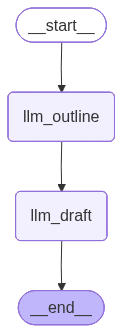

In [7]:
graph = StateGraph(BlogState)

graph.add_node('llm_outline', llm_outline)
graph.add_node('llm_draft', llm_draft)

graph.add_edge(START, 'llm_outline')
graph.add_edge('llm_outline', 'llm_draft')
graph.add_edge('llm_draft', END)

graph.compile()

In [8]:
workflow = graph.compile()
initial_state = {
    'topic': "The Future of Artificial Intelligence"
}
final_state = workflow.invoke(initial_state)


In [9]:
print(final_state['outline'].content)

Here's a suggested outline for a blog post on "The Future of Artificial Intelligence":

**I. Introduction**

- Brief overview of the current state of AI
- Importance of understanding the future of AI
- Thesis statement: The future of AI holds immense potential for transforming industries, revolutionizing daily life, and raising complex questions about ethics and responsibility.

**II. Emerging Trends in AI**

- Overview of current AI trends (e.g., deep learning, natural language processing, computer vision)
- Discussion of emerging trends (e.g., explainable AI, transfer learning, edge AI)
- Examples of companies and researchers working on these trends

**III. Applications of AI in Various Industries**

- Healthcare: AI-assisted diagnosis, personalized medicine, and robotic surgery
- Finance: AI-powered trading, risk management, and customer service
- Transportation: Self-driving cars, smart traffic management, and logistics optimization
- Education: AI-powered learning platforms, adapt

In [ ]:
print(final_state['draft'].content)

**The Future of Artificial Intelligence: Transforming Industries, Revolutionizing Daily Life, and Raising Complex Questions**

As we navigate the complexities of the 21st century, one technology has emerged as a game-changer: Artificial Intelligence (AI). From virtual assistants to self-driving cars, AI has already begun to transform industries and revolutionize daily life. However, as AI continues to advance, it also raises complex questions about ethics, responsibility, and the potential impact on jobs and society.

In this blog post, we'll explore the current state of AI, emerging trends, applications in various industries, the impact on jobs and the workforce, ethics and responsibility, and the future of AI. We'll examine the potential breakthroughs and advancements in AI research, speculate on the potential impact of AI on society, and discuss the importance of transparency, explainability, and human oversight in AI systems.

**I. Introduction**

Artificial Intelligence has come a

: 